In [2]:
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

# Images and Numpy

In [3]:
# image loader function
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text="ABCDE", org=(50,300), fontFace = font, fontScale=5,color=(255,255,255),thickness=30)
    return blank_img

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from PIL import Image

In [20]:
pic = Image.open('Computer-Vision-with-Python/DATA/00-puppy.jpg')

In [21]:
# we can transform JPEG picture into an array format
pic_arr = np.asarray(pic)

In [22]:
pic_arr.shape

(1300, 1950, 3)

In [23]:
pic_red = pic_arr.copy()

In [24]:
# plt.imshow(pic_red[:,:,0], cmap = 'gray') # R G B

In [25]:
# plt.imshow(pic_red[:,:,1], cmap = 'gray') # R G B

In [26]:
# plt.imshow(pic_red[:,:,2], cmap = 'gray') # R G B

In [27]:
# pick up the green channel and set all equal to zero
pic_red[:, :, 1] = 0
pic_red[:, :, 0] = 0

# Image using opencv

In [5]:
import cv2

In [2]:
img = cv2.imread("Computer-Vision-with-Python/DATA/00-puppy.jpg")
type(img)

numpy.ndarray

In [151]:
# new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(new_img)

In [152]:
# img_gray = cv2.imread("Computer-Vision-with-Python/DATA/00-puppy.jpg", cv2.IMREAD_GRAYSCALE) # open as grayscale
# plt.imshow(img_gray, cmap = 'gray')

In [153]:
# # resize image
# plt.imshow(cv2.resize(new_img, (1000, 500)))

In [154]:
# # resize image based on the ratio
# w_ratio = 0.5
# h_ratio = 0.5
# new_img2 = cv2.resize(new_img, (0,0), new_img, w_ratio, h_ratio)
# plt.imshow(new_img2)

In [155]:
# # flip the image
# new_img3 = cv2.flip(new_img, 1)
# plt.imshow(new_img3)

In [29]:
cv2.imwrite('totally_new.jpg', cv2.cvtColor(new_img3, cv2.COLOR_RGB2BGR))

True

## Draw an image

In [20]:
blank_img = np.zeros(shape=(512,512,3), dtype = np.int16)

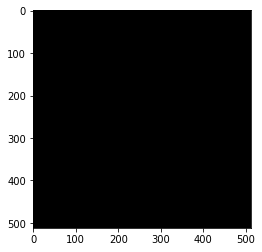

In [21]:
plt.imshow(blank_img)

In [41]:
# cv2.rectangle(blank_img, pt1 = (200,200), pt2 = (300, 300), color = (0,0,255), thickness = 5)

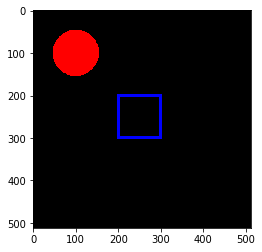

In [15]:
# draw circle
cv2.circle(blank_img, center = (100, 100), radius = 50, color = (255, 0, 0), thickness = -1) # filled : thickness -> -1
plt.imshow(blank_img)

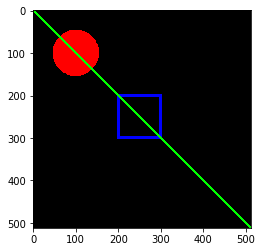

In [17]:
# draw line
cv2.line(blank_img, pt1=(0,0), pt2=(512, 512), color=(0,255,0), thickness=4)
plt.imshow(blank_img)

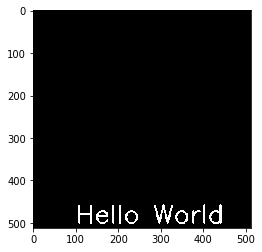

In [22]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img, text = "Hello World", org=(100, 500), fontFace = font, fontScale = 2, color = (255,255,255),
           thickness = 3, lineType = cv2.LINE_AA)
plt.imshow(blank_img)

In [26]:
blank_img = np.zeros(shape=(512,512,3), dtype=np.int32)

In [27]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]], dtype = np.int32)
vertices.shape


(4, 2)

In [29]:
pts = vertices.reshape((-1,1,2))

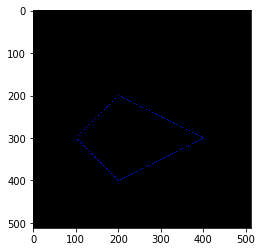

In [30]:
# has to reshape the vertices and pass it to the list as a second argument of polylines function
cv2.polylines(blank_img, [pts], isClosed = True, color = (0, 0, 255))
plt.imshow(blank_img)

# Drawing image with mouse

In [ ]:
# Function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 100, (0,255,0),-1)

cv2.namedWindow(winname = 'my_drawing')

cv2.setMouseCallback('my_drawing', draw_circle)


# Show image with opencv
img = np.zeros(shape=(512,512,3), dtype=np.int8)

while True:
    cv2.imshow('my_drawing', img)
    
    if cv2.waitKey(20) & 0xff == 27:
        break
        
cv2.destroyAllWindows()

In [34]:
curr_img = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.jpg')
type(curr_img)

numpy.ndarray

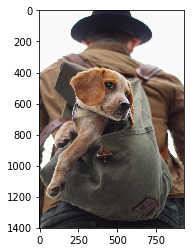

In [35]:
curr_img = cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB)
plt.imshow(curr_img)

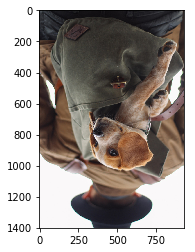

In [36]:
# flip
new_img = cv2.flip(curr_img, -1)
plt.imshow(new_img)

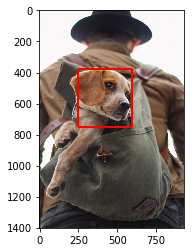

In [40]:
# draw a red rectangle around dog's face
ig = cv2.rectangle(curr_img, (250,750), (600,380), color=(255,0,0), thickness=9)
plt.imshow(ig)

## Color Space

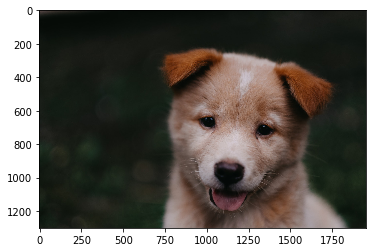

In [42]:
img = cv2.imread("Computer-Vision-with-Python/DATA/00-puppy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB
plt.imshow(img)

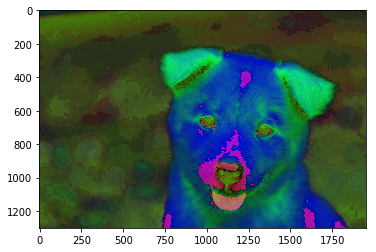

In [44]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # HSV
plt.imshow(img) 

## Blend Images

In [60]:
img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # RGB
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # RGB

In [46]:
# resize
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

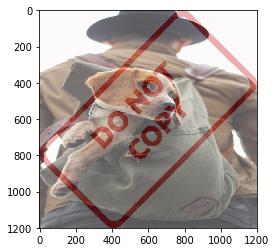

In [53]:
blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2, beta=0.3, gamma=0)
plt.imshow(blended)

In [61]:
# use numpy reassignment to overlay small img to large img
img2 = cv2.resize(img2, (600,600))

In [56]:
x_offset = 0
y_offset = 0

In [57]:
x_end = x_offset + img2.shape[1]
y_end = y_offset + img2.shape[0]

In [58]:
img1[y_offset:y_end, x_offset:x_end] = img2

In [62]:
img1.shape

(1401, 934, 3)

In [63]:
x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600

In [65]:
rows, cols, channels = img2.shape

In [67]:
roi = img1[y_offset:1401, x_offset:934]
# plt.imshow(roi)

In [70]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

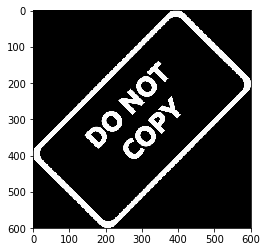

In [72]:
# make a mask
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap='gray') # now black background

In [73]:
white_background = np.full(img2.shape, 255, dtype = np.uint8)

In [74]:
bk = cv2.bitwise_or(white_background, white_background, mask = mask_inv)
bk.shape # now we have color channel

(600, 600, 3)

In [75]:
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)

In [76]:
final_roi = cv2.bitwise_or(roi, fg)

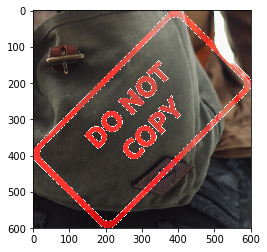

In [77]:
plt.imshow(final_roi)

In [78]:
large_img = img1
small_img = final_roi

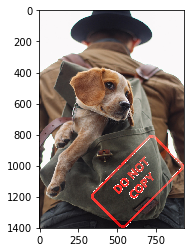

In [79]:
large_img[y_offset:1401, x_offset:934] = small_img
plt.imshow(large_img)

# Image Threshold

In [82]:
img = cv2.imread("Computer-Vision-with-Python/DATA/rainbow.jpg", 0)

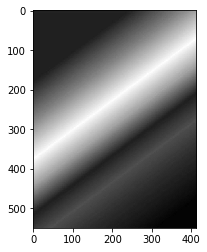

In [84]:
plt.imshow(img, cmap = 'gray')

In [97]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

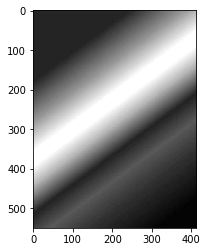

In [98]:
plt.imshow(thresh1, cmap = 'gray') # below 127 -> 0 and above 127 -> 1

In [99]:
# open a new img
img = cv2.imread("Computer-Vision-with-Python/DATA/crossword.jpg", 0)

In [26]:
def show_pic(img):
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [150]:
# ret, thresh1 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
# show_pic(thresh1)

In [105]:
# adaptive threshold
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)

In [149]:
# # blend images
# blended = cv2.addWeighted(src1 = thresh1, alpha = 0.55, src2 = th2, beta = 0.45, gamma = 0)
# show_pic(blended)

# Blurring

In [125]:
img = cv2.imread("Computer-Vision-with-Python/DATA/bricks.jpg").astype(np.float32) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [126]:
# gamma = 0.25 # gamma correction
# result = np.power(img, gamma)
# show_pic(result)

In [132]:
# Add Font
# font = cv2.FONT_HERSHEY_COMPLEX
# cv2.putText(img, text='Bricks', org=(10,600), fontFace=font, fontScale=10, color=(255,0,0), thickness=4)
# show_pic(img)

In [121]:
kernel = np.ones(shape=(5,5), dtype=np.float32)/25

In [123]:
dst = cv2.filter2D(img, -1, kernel)

In [130]:
# Gaussian blurring (* median blurring is efficient for noisy removal)
result = cv2.GaussianBlur(img, (5,5), 10)
show_pic(result)

In [137]:
# Median Blurring
img = cv2.imread('Computer-Vision-with-Python/DATA/sammy_noise.jpg') # very noisy image
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show_pic(img)

In [148]:
# median = cv2.medianBlur(img, 5)
# show_pic(median)

# Morphological operator

In [198]:
img = load_img()
# show_pic(img)

In [176]:
# # [1] Erosion
# kernel = np.ones((5,5),dtype=np.uint8)
# result = cv2.erode(img, kernel,iterations=4)
# show_pic(result)

In [183]:
## [2] Opening
white_noise = np.random.randint(low=0,high=2,size=(600,600)) # make a noisy image
white_noise = white_noise * 255

In [186]:
noise_img = white_noise + img # add text to our noisy bg
# show_pic(noise_img)

In [185]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
# show_pic(opening)

In [199]:
# # Now deal with fg noise
# black_noise = np.random.randint(low=0,high=2,size=(600,600))
# black_noise = black_noise * -255
# noise_img = black_noise + img

# noise_img[noise_img == -255] = 0 
# show_pic(noise_img)

In [191]:
# closing = cv2.morphologyEx(noise_img, cv2.MORPH_CLOSE, kernel)
# show_pic(closing)

In [201]:
# [3] Gradient
# gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
# show_pic(gradient)

# Gradients

In [211]:
img = cv2.imread("Computer-Vision-with-Python/DATA/sudoku.jpg", 0)
# show_pic(img)

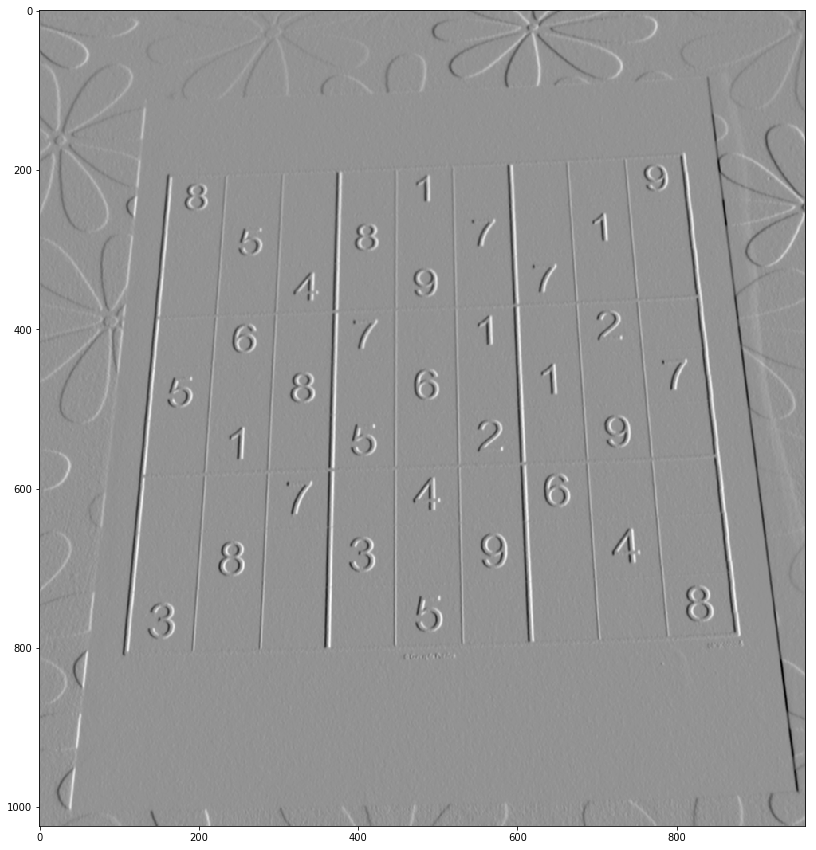

In [212]:
# [1] calculate X-gradient sobel ( ksize = 5)
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
show_pic(sobelX)

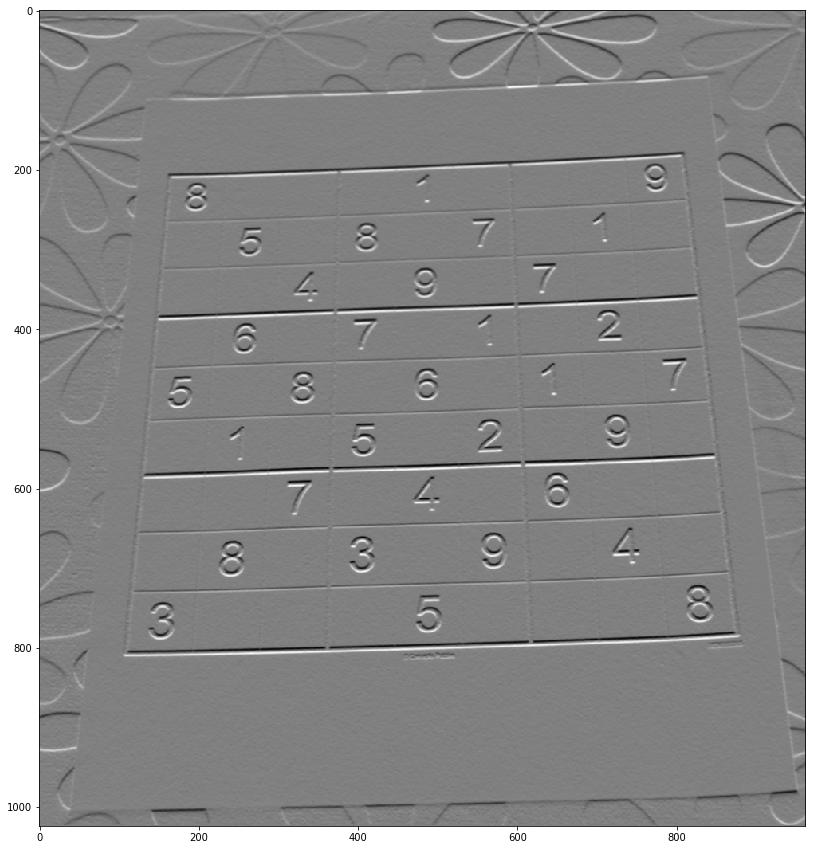

In [213]:
# [2] calculate Y -gradient sobel ( ksize = 5)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)
show_pic(sobelY)

In [215]:
# laplacian = cv2.Laplacian(img, cv2.CV_64F)
# show_pic(laplacian)

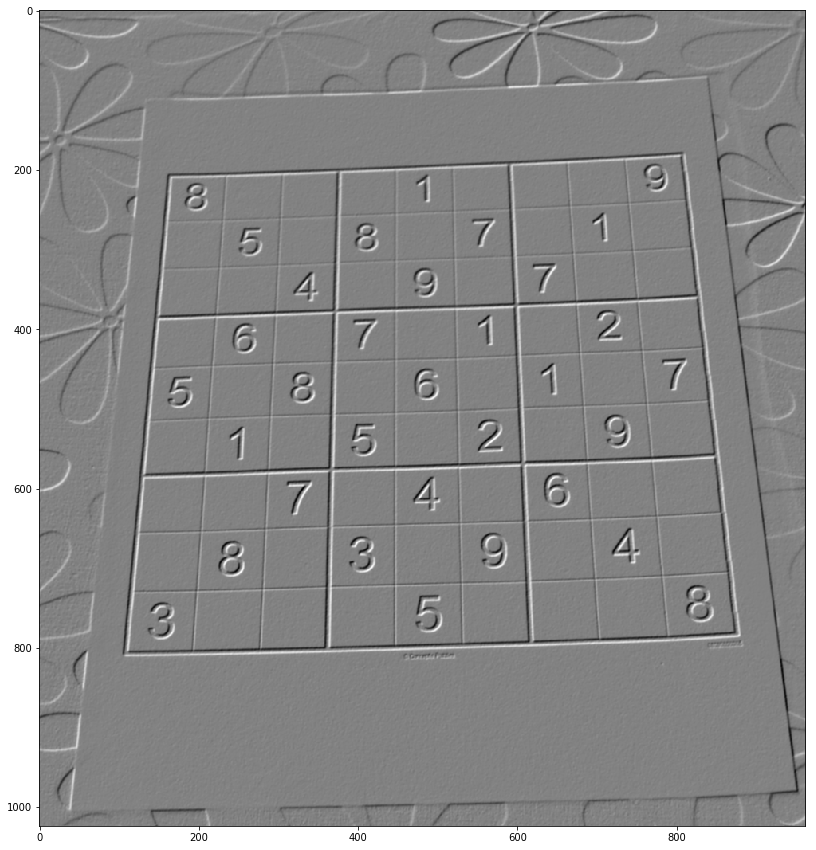

In [216]:
# Blend images using addWeighted
blended = cv2.addWeighted(src1 = sobelX, src2 = sobelY, alpha = 0.5, beta = 0.5, gamma = 0)
show_pic(blended)

In [222]:
# MORPH gradient
# gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
# show_pic(gradient)

# Color Channel Histogram

In [278]:
# load three images
dark_horse = cv2.imread("Computer-Vision-with-Python/DATA/horse.jpg")
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread("Computer-Vision-with-Python/DATA/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread("Computer-Vision-with-Python/DATA/bricks.jpg")
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

In [230]:
hist_values = cv2.calcHist([blue_bricks], channels = [0], mask = None, histSize = [256], ranges = [0,256])

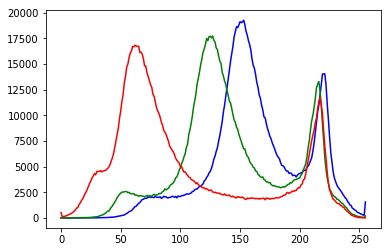

In [235]:
# plot all three color hists 
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histr = cv2.calcHist([blue_bricks], channels = [i], mask = None, histSize = [256], ranges = [0,256])
    plt.plot(histr, color = col)

In [279]:
# Mask and hist equalization
mask = np.zeros(rainbow.shape[:2], np.uint8)

In [280]:
mask[300:400,100:400] = 255

In [283]:
masked_img = cv2.bitwise_and(rainbow, rainbow, mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask = mask)

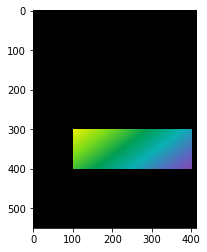

In [284]:
plt.imshow(show_masked_img)

In [241]:
hist_mask_value_red = cv2.calcHist([rainbow], channels = [2], mask = mask, histSize = [256], ranges = [0,256])
hist_value_red = cv2.calcHist([rainbow], channels = [2], mask = None, histSize = [256], ranges = [0,256])

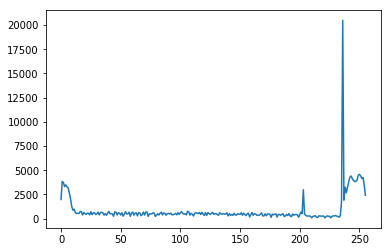

In [244]:
plt.plot(hist_value_red)

In [298]:
# Hist equalization!
gorilla = cv2.imread("Computer-Vision-with-Python/DATA/gorilla.jpg", 0)
hist_values = cv2.calcHist([gorilla], channels = [0], mask = None, histSize = [256], ranges = [0,256])

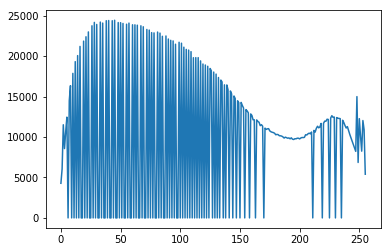

In [299]:
eq_gorilla = cv2.equalizeHist(gorilla)
hist_values = cv2.calcHist([eq_gorilla], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.plot(hist_values)

In [301]:
# For color image
# Hist equalization!
gorilla = cv2.imread("Computer-Vision-with-Python/DATA/gorilla.jpg")
gorilla = cv2.cvtColor(gorilla, cv2.COLOR_BGR2RGB)

In [303]:
# make HSV version
hsv = cv2.cvtColor(gorilla, cv2.COLOR_RGB2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

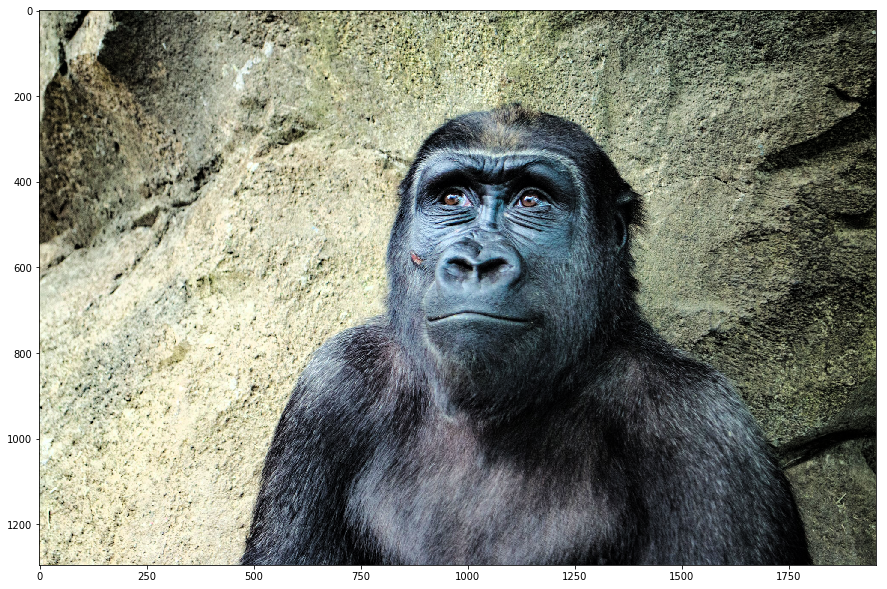

In [304]:
eq_gor = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
show_pic(eq_gor)

In [320]:
# [1] open giraffes image
img = cv2.imread("Computer-Vision-with-Python/DATA/giraffes.jpg",0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show_pic(img)

In [310]:
# [2] apply binary threshold
# ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# show_pic(th1)

In [312]:
# [3] apply HSV
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# show_pic(img)

In [319]:
# [4] create a low-pass filter
kernel = np.ones(shape=(4,4), dtype=np.float32) / 10
# dst = cv2.filter2D(img, -1, kernel)
# show_pic(dst)

In [ ]:
# [5] apply sobel filter on the x-axis
sobelx = cv2.Sobel(img)

In [7]:
# sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
# show_pic(sobelX)

# Video

In [323]:
cap = cv2.VideoCapture(0) # a series of images
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    ret, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow(gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [326]:
# read video file
cap = cv2.VideoCapture('Computer-Vision-with-Python/myVideo.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

# Drawing a Live Camera

In [ ]:
cap = cv2.VideoCapture(0) # a series of images

# callback function
def draw_rectangle(event,x,y,flags,param):
    global pt1, pt2, topLeft_clicked, botRight_clicked
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        #reset
        if topLeft_clicked and botRight_clicked:
            pt1 = (0,0)
            pt2 = (0,0)
            topLeft_clicked = False
            botRight_clicked = False     
        
        if topLeft_clicked == False:
            pt1 = (x,y)
            topLeft_clicked = True
        
        elif botRight_clicked == False:
            pt2 = (x,y)
            botRight_clicked = True

# global variables
pt1 = (0,0)
pt2 = (0,0)
topLeft_clicked = False
botRight_clicked = False

cv2.namedWindow('Test')
cv2.setMouseCallback('Test', draw_rectangle)

while True:
    ret, frame = cap.read()
    # drawing on the frame
    if topLeft_clicked:
        cv2.circle(frame, center = pt1,radius=4,color=(0,0,255),thickness=-1)
    
    if topLeft_clicked and botRight_clicked:
        cv2.rectangle(frame,pt1,pt2,color=(0,0,255),thickness=5)
    
    cv2.imshow('Test',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Project ( draw a blue circle on the video stream)
cap = cv2.VideoCapture(0)

def draw_circle(event,x,y,flags,param):
    global center, clicked
    if event == cv2.EVENT_LBUTTONDOWN:
        center = (x,y)
        clicked = False
    elif event == cv2.EVENT_LBUTTONUP:
        center = (0,0)
        clicked = True        

center = (0,0)
clicked = False

cv2.namedWindow('Test')
cv2.setMouseCallback('Test', draw_circle)

while True:
    ret, frame = cap.read()
    
    if clicked:
        cv2.circle(frame, center = center, radius = 10, color = (255,0,0), thickness = 5)
        
    cv2.imshow('Test', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Template Matching

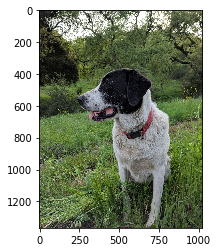

In [24]:
full = cv2.imread("Computer-Vision-with-Python/DATA/sammy.jpg")
# full = cv2.imread("sub.png")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

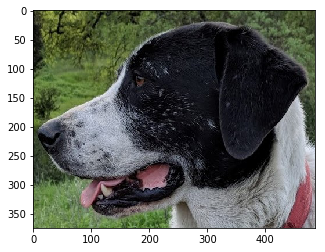

In [25]:
# upload template image
face = cv2.imread("Computer-Vision-with-Python/DATA/sammy_face.jpg")
# face = cv2.imread("main.png")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [26]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

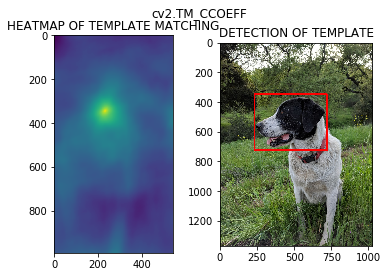

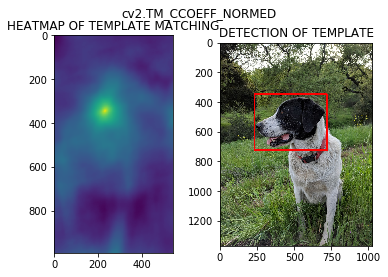

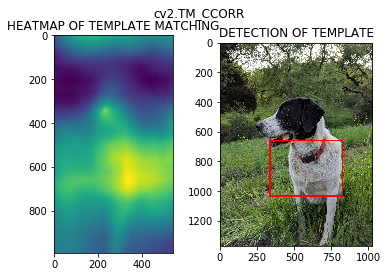

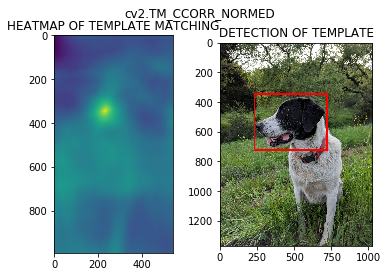

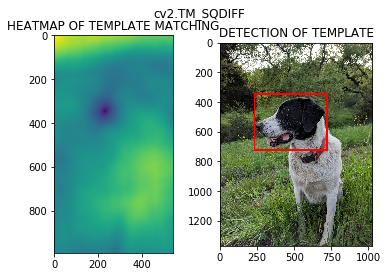

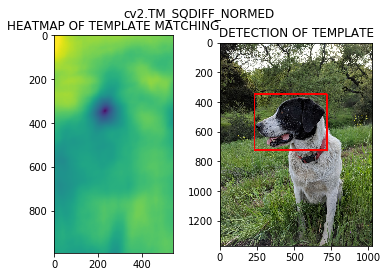

In [27]:
for m in methods:
    # create a copy image
    full_copy = full.copy()
    
    method = eval(m)
    
    # template matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, channel = face.shape
    
    # to figure out teh rectangle size
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, color=(255,0,0),thickness=10)
    
    # plot and show the image
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n\n')

# Corner Detection

In [90]:
flat_chess = cv2.imread("Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

In [40]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
real_chess = cv2.imread("Computer-Vision-with-Python/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [31]:
# change to gray
gray = np.float32(gray_flat_chess)

In [32]:
# [1] apply harris corner detection
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)

In [33]:
dst = cv2.dilate(dst, None)

In [34]:
flat_chess[dst > 0.01 * dst.max()] = [255,0,0]

In [36]:
gray = np.float32(gray_real_chess)

In [37]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)
real_chess[dst > 0.01 * dst.max()] = [255,0,0]

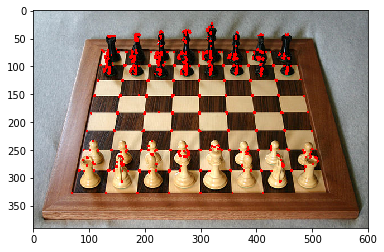

In [38]:
plt.imshow(real_chess)

# Corner Detection - Shi-Tomasi Detection

In [41]:
corner = cv2.goodFeaturesToTrack(gray_flat_chess, 10, 0.01, 10)

In [42]:
# convert into integer
corner = np.int0(corner)

In [44]:
for i in corner:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

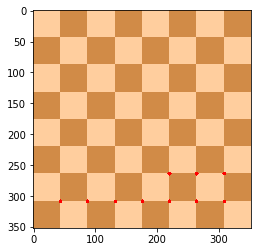

In [45]:
plt.imshow(flat_chess)

# Edge Detection

In [71]:
img = cv2.imread("Computer-Vision-with-Python/DATA/sammy_face.jpg")

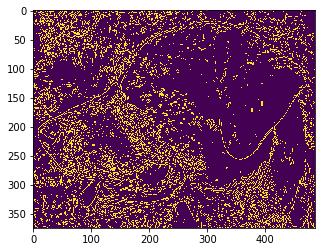

In [72]:
# canny edge
edges = cv2.Canny(image = img, threshold1 = 127, threshold2 = 127)
plt.imshow(edges)

In [73]:
# find median pixel value
med_val = np.median(img)
med_val

64.0

In [75]:
# lower = either 0 or 30% of med value
# upper = either 255 or 130% of med value
lower = int(max(0, 0.7 * med_val))
upper = int(min(255, 1.3 * med_val))

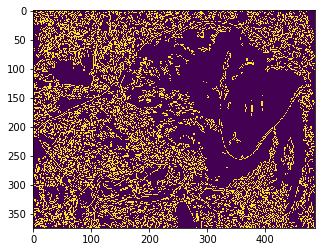

In [77]:
edges = cv2.Canny(image = img, threshold1 = lower, threshold2 = upper + 111)
plt.imshow(edges)

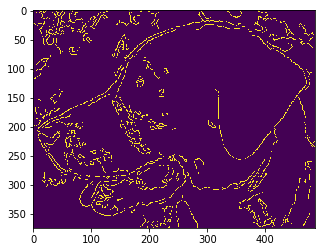

In [81]:
# blur image!! and then apply Canny edge detection
blurred_img = cv2.blur(img, ksize = (5,5))
edges = cv2.Canny(image = blurred_img, threshold1 = lower, threshold2 = upper+50)
plt.imshow(edges)

# Grid Detection

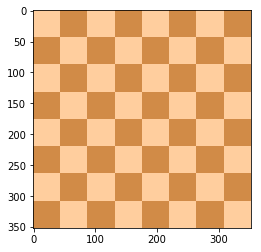

In [91]:
plt.imshow(flat_chess)

In [92]:
# Note : should look like chess board and mainly used for camera calibration
found, corners = cv2.findChessboardCorners(flat_chess, (7,7))

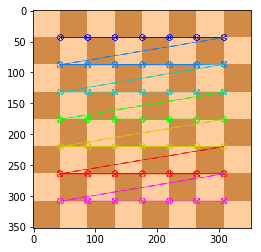

In [93]:
# once found grid, draw!
cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)
plt.imshow(flat_chess)

In [98]:
# Dot Grid
dots = cv2.imread("Computer-Vision-with-Python/DATA/dot_grid.png")

In [99]:
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

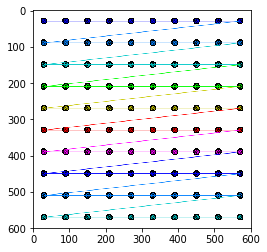

In [100]:
cv2.drawChessboardCorners(dots, (10,10), corners, found)
plt.imshow(dots)

# Contour Detection

In [101]:
img = cv2.imread("Computer-Vision-with-Python/DATA/internal_external.png", 0)

In [114]:
# find contours
image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [115]:
# make an empty array
external_contours = np.zeros(img.shape)

In [116]:
for i in range(len(contours)):
    # external if -1
    if hierarchy[0][i][3] == -1: # indexing  
        cv2.drawContours(external_contours, contours, i, 255, -1) # 255 for white and -1 for filled-in
    else:
        cv2.drawContours(external_contours, contours, i, 123, -1)

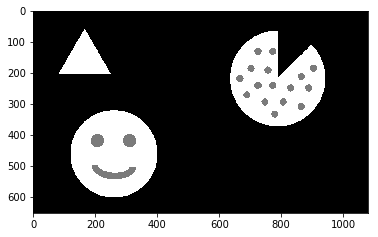

In [117]:
plt.imshow(external_contours, cmap="gray")

# Feature Matching

In [6]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [206]:
# reeses = cv2.imread("Computer-Vision-with-Python/DATA/reeses_puffs.png",0)
reeses = cv2.imread("wheats.png",0)

In [207]:
# target
cereals = cv2.imread("Computer-Vision-with-Python/DATA/many_cereals.jpg",0)

In [208]:
# create a detector object
orb = cv2.ORB_create()

In [209]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [210]:
# create a brute-force object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [211]:
matches = bf.match(des1, des2)

In [212]:
matches = sorted(matches, key = lambda x: x.distance) # sort

In [213]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:30], None, flags = 2)

In [215]:
# display(reeses_matches)

# Feature Matching with SIFT descriptor

In [225]:
# create a sift descriptor
sift = cv2.xfeatures2d.SIFT_create()

In [226]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [227]:
bf = cv2.BFMatcher()

In [228]:
matches = bf.knnMatch(des1, des2, k = 2)

In [229]:
good = [] # keep holding good match (short distance)

In [230]:
# if match1 distance is less than 75% of match2 distance, good match
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [231]:
# Let's draw
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags = 2)

In [233]:
# display(sift_matches)

In [234]:
# FLANN-based matches
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [235]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [236]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [237]:
matches = flann.knnMatch(des1, des2, k=2)

In [238]:
matchesMask = [[0,0] for i in range(len(matches))]

In [239]:
# good = []
for i, (m1, m2) in enumerate(matches):
    if m1.distance < 0.8 * m2.distance:
#         good.append([m1])
        matchesMask[i] = [1,0]

In [240]:
draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = 0)

In [241]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

In [253]:
# display(flann_matches)

# Watershed algorithm

In [288]:
sep_coins = cv2.imread("Computer-Vision-with-Python/DATA/pennies.jpg")
gray_coins = cv2.cvtColor(sep_coins, cv2.COLOR_BGR2GRAY)

In [289]:
# Median blur
sep_blur = cv2.medianBlur(gray_coins, 35)
# display(sep_blur)

In [294]:
ret, sep_thresh = cv2.threshold(sep_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# display(sep_thresh)

In [272]:
# find contours
# image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [273]:
# for i in range(len(contours)):
#     if hierarchy[0][i][3] == -1:
#         cv2.drawContours(sep_coins, contours, i, (255,0,0),30)

In [275]:
# display(sep_coins) # Not good result!!!

In [295]:
# Noisy Reduction (optional)
kernel = np.ones((3,3),np.uint8)

In [297]:
opening = cv2.morphologyEx(sep_thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
# display(opening)

In [304]:
#### Distance Transformation
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

In [309]:
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

In [306]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255,0)

In [308]:
sure_fg = np.uint8(sure_fg)

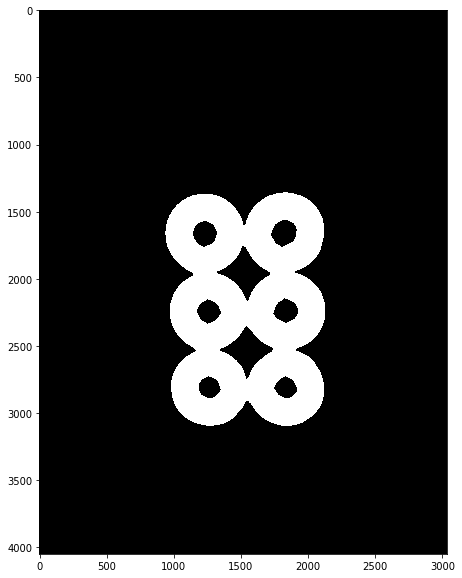

In [311]:
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)

In [312]:
# make marker
ret, markers = cv2.connectedComponents(sure_fg)

In [313]:
markers = markers + 1
markers[unknown==255] = 0

In [314]:
markers = cv2.watershed(sep_coins, markers)

In [319]:
# display(markers) # now we have 6 distinct markers

In [316]:
image, contours, hierarchy = cv2.findContours(markers, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [317]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0),30)

In [320]:
# display(sep_coins)

# Face Detection

In [17]:
me = cv2.imread("Computer-Vision-with-Python/DATA/me3.png",0)
denis = cv2.imread('Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('Computer-Vision-with-Python/DATA/solvay_conference.jpg',0)

In [18]:
face_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [19]:
def detect_face(img):
    face_img = img.copy()
    
    face_rect = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
        
    return face_img

In [20]:
result = detect_face(solvay)

In [24]:
def adj_detect_face(img):
    face_img = img.copy()
    
    face_rect = face_cascade.detectMultiScale(face_img, scaleFactor = 1.12, minNeighbors = 6)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
        
    return face_img

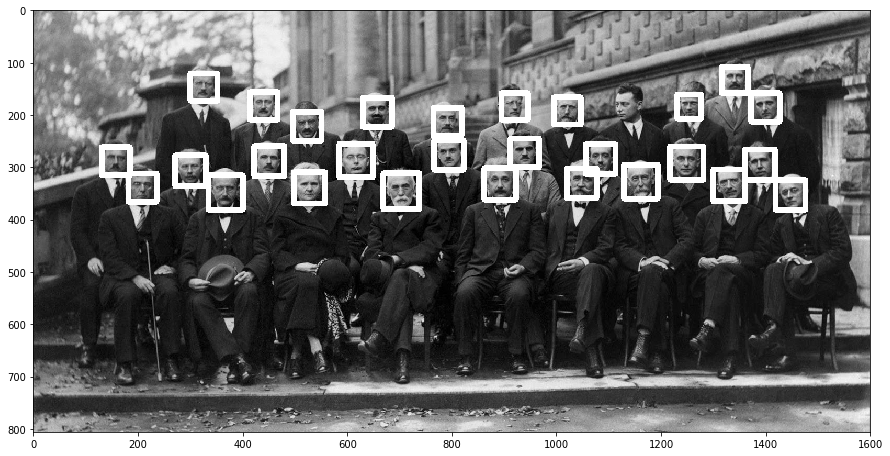

In [28]:
result = adj_detect_face(solvay)
show_pic(result)

In [11]:
# eye cascade
eye_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')

In [12]:
def adj_detect_eye(img):
    face_img = img.copy()
    
    face_rect = eye_cascade.detectMultiScale(face_img, scaleFactor = 1.5, minNeighbors = 2)
    
    for (x,y,w,h) in face_rect:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
        
    return face_img

In [13]:
result = adj_detect_eye(me)

In [14]:
display(result)

array([[184, 167, 154, ...,  89,  88,  90],
       [179, 166, 156, ...,  93,  95,  99],
       [174, 163, 156, ...,  98, 102, 105],
       ...,
       [ 91,  94,  96, ...,  71,  72,  72],
       [ 93,  95,  96, ...,  72,  73,  72],
       [ 95,  97,  99, ...,  72,  72,  71]], dtype=uint8)

## ACCESSMENT

In [293]:
# open image
img = cv2.imread("Computer-Vision-with-Python/DATA/russian_plate.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# display(img)

In [287]:
# make cascade classifier
plate_cas = cv2.CascadeClassifier("Computer-Vision-with-Python/DATA/haarcascades/haarcascade_russian_plate_number.xml")

In [288]:
def detect_plate(sc):
    copy_img = sc.copy()
    
    plate_rect = plate_cas.detectMultiScale(copy_img, scaleFactor = 1.2, minNeighbors = 5)
    
    # now that we have our own ROI we can blur only that part
    return tuple(plate_rect[0])

In [289]:
coord = detect_plate(gray_img)

In [290]:
def blur_img(coord):
    x,y,w,h = coord
        
#     cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),20)
    # grab ROI
    roi = img[y:y+h, x:x+w]
    
    # blur that part
    blur_roi = cv2.medianBlur(roi, 19)
    
    # merge
    img[y:y+h, x:x+w] = blur_roi

In [292]:
blur_img(coord)
# display(img)

# Optical Flow

In [294]:
corner_track_params = dict(maxCorners = 10, qualityLevel = 0.3, minDistance = 7, blockSize = 7)

In [295]:
lk_params = dict(winSize = (200,200), max_level = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

In [ ]:
cap = cv2.VideoCapture(0)

ret, prev_frame = cap.read()

prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# points to track
prevPts = cv2.goodFeaturesToTrack(prev_gray, mask = None, **corner_track_params)

mask = np.zeros_like(prev_frame)

while True:
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # calculate optical flow
    nextPts, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, frame_gray, prevPts, None, **lk_params)
    
    good_new = nextPts[status == 1]
    good_prev = prevPts[status == 1]
    
    for i, (new, prev) in enumerate(zip(good_new, good_prev)):
        x_new, y_new = new.ravel()
        x_prev, y_prev = prev.ravel()
        
        mask = cv2.line(mask, (x_new, y_new), (x_prev, y_prev), (0,255,0), 4)
        
        frame = cv2.circle(frame, (x_new, y_new), 8, (0,0,255), -1)
        
    img = cv2.add(frame, mask)
    cv2.imshow('tracking', img)
    
    k = cv2.waitKey(0) & 0xFF
    if k == 27:
        break
        
    prev_gray = frame_gray.copy()
    prevPts = good_new.reshape(-1,1,2)
    
cv2.destroyAllWindows()
cap.release()

# Dense Optical Flow

In [ ]:
cap = cv2.VideoCapture(0)

ret, frame1 = cap.read()

prvsImg = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

hsv_mask = np.zeros_like(frame1)
hsv_mask[:,:,1] = 255 # fully saturated

while True:
    ret, frame2 = cap.read()
    
    next_img = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    # return cartesian coordinate
    flow = cv2.calcOpticalFlowFarneback(prvsImg, next_img, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    # convert into polar coordinate
    mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1], angleInDegrees = True)
    
    hsv_mask[:,:,0] = ang / 2
    hsv_mask[:,:,2] = cv2.normalize(mag, None, 0,255, cv2.NORM_MINMAX)
    
    bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
    cv2.imshow('frame', bgr)

    k = cv2.waitKey(0) & 0xFF
    if k == 27:
        break
        
    prvsImg = next_img
    
        
cv2.destroyAllWindows()
cap.release()

# MeanShift and CAMShift

In [7]:
cap = cv2.VideoCapture(0)

ret, frame = cap.read()

face_cascade = cv2.CascadeClassifier("Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml")
face_rect = face_cascade.detectMultiScale(frame)

(face_x, face_y, w, h) = tuple(face_rect[0])
track_window = (face_x, face_y, w, h)

roi = frame[face_y:face_y+h, face_x:face_x+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0,180])

 
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        
#         ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
#         x, y, w, h = track_window
#         img2 = cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 5)
        
        # Change to CAMShift
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame, [pts], True, (0,0,255), 5)
        
    
        cv2.imshow('img', img2)
        
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break
    else:
        break
        
cv2.destroyAllWindows()
cap.release()

# Keras

In [1]:
from numpy import genfromtxt # generate array from txt file

data = genfromtxt('Computer-Vision-with-Python/DATA/bank_note_data.txt', delimiter=',')

In [2]:
# [1] separate label from attribute
labels = data[:,4]
features = data[:,:4]

In [3]:
# [2] split data into train and test set
from sklearn.model_selection import train_test_split

X = features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [4]:
# [3] Data Transformation to scale 
from sklearn.preprocessing import MinMaxScaler
scaler_obj = MinMaxScaler()

In [5]:
scaler_obj.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
scaled_X_train = scaler_obj.transform(X_train)
scaled_X_test = scaler_obj.transform(X_test)

In [9]:
# [4] Build a model
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model = Sequential()

In [20]:
model.add(Dense(4, input_dim = 4, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
model.fit(scaled_X_train, y_train, epochs = 50)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
predictions = model.predict_classes(scaled_X_test)

In [25]:
# [5] Evaluate our model
confusion_matrix(y_test, predictions)

array([[228,   1],
       [ 12, 171]])

# Keras with MNIST

In [28]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [38]:
# [1] Do ont-hot-encoding
from keras.utils.np_utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [39]:
# [2] data preprocessing -> min,max 
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [41]:
# [3] reshape data (add color-channel)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1) 

In [45]:
# [4] build a model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# convolutional layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu'))

# pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

# flatten
model.add(Flatten())

# dense layer
model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [52]:
# model.fit(x_train, y_cat_train, epochs = 2)

# Keras with CIFAR 10

In [53]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 143s 1us/step


In [54]:
# [1] data preprocessing -> scale
x_train = x_train /255
x_test = x_test / 255

In [55]:
# [2] one-hot encoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [57]:
# [3] build a model
model = Sequential()

# conv layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# conv layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Keras with custom images

In [59]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.15,
                              height_shift_range = 0.15,
                              rescale = 1/255,
                              shear_range = 0.2, zoom_range = 0.2,
                              horizontal_flip = True,
                              fill_mode = 'nearest'
                              )

In [61]:
from keras.layers import Activation, Dropout
image_gen.flow_from_directory('Computer-Vision-with-Python/CATS_DOGS/CATS_DOGS/train', target_size = (170,170,3))

Found 18743 images belonging to 2 classes.


In [62]:
# build a model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (170,170,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (170,170,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (170,170,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



In [73]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('Computer-Vision-with-Python/CATS_DOGS/CATS_DOGS/train', target_size = (170,170),
                                               batch_size = batch_size, class_mode = 'binary')
test_image_gen = image_gen.flow_from_directory('Computer-Vision-with-Python/CATS_DOGS/CATS_DOGS/test', target_size = (170,170),
                                               batch_size = batch_size, class_mode = 'binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [74]:
from keras.models import load_model
from keras.preprocessing import image
new_model = load_model('Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

In [75]:
dog_file = 'Computer-Vision-with-Python/dog_1.png'
dog_img = image.load_img(dog_file, target_size = (170,170))
dog_img = image.img_to_array(dog_img)

import numpy as np
dog_img = np.expand_dims(dog_img, axis = 0)

dog_img = dog_img / 255

print(model.predict_classes(dog_img))
print(model.predict(dog_img))

[[0]]
[[0.49494967]]


# Capstone Project

This capstone project allows me to implement a deep learning neural network to detect fingers from cam and count the number of extended fingers.
The main techniques used are; Threshold, Contour Detection, Convex Hull, Gaussian Blur.

In [2]:
from sklearn.metrics import pairwise
import cv2
import numpy as np

In [3]:
background = None
accumulated_weight = 0.5
roi_top = 20
roi_bottom = 300
roi_right = 300
roi_left = 600

In [4]:
def calc_accum_avg(frame, accumulated_weight):
    global background
    
    if background is None:
        background = frame.copy().astype('float')
        return None
    cv2.accumulateWeighted(frame, background, accumulated_weight)

In [5]:
def segment(frame, threshold_min = 25):
    diff = cv2.absdiff(background.astype('uint8'), frame)
    
    # apply threshold to img
    ret, thresholded = cv2.threshold(diff, threshold_min, 255, cv2.THRESH_BINARY)
    
    # grab contour
    image, contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return None
    else:
        # assume largest external contour in ROI is hand
        hand_segment = max(contours, key = cv2.contourArea)
        
        return (thresholded, hand_segment)

In [6]:
def count_fingers(thresholded, hand_segments):
    conv_hull = cv2.convexHull(hand_segments)
    # top
    top = tuple(conv_hull[conv_hull[:,:,1].argmin()[0]])
    bottom = tuple(conv_hull[conv_hull[:,:,1].argmin()[0]])
    left = tuple(conv_hull[conv_hull[:,:,0].argmin()[0]])
    right = tuple(conv_hull[conv_hull[:,:,0].argmin()[0]])
    
    # find center
    cX = (left[0] + right[0]) // 2
    cY = (top[1] + bottom[1]) // 2
    
    distance = pairwise.euclidean_distances([cX, cY], Y = [left, right, top, bottom])[0]
    
    # get max distance
    max_distance = distance.max()
    
    # create a circle
    radius = int(0.9 * max_distance)
    circumference = (2 * np.pi * radius)
    
    # ROI for that circle (exclude color channel)
    circular_roi = np.zeros(thresholded[:2], dtype = 'uint8')
    
    # draw circle
    cv2.circle(circular_roi, (cX, cY), radius, 255, 10)
    
    circular_roi = cv2.bitwise_and(thresholded, thresholded, mask = circular_roi)
    
    image, contours, hierarchy = cv2.findContours(circular_roi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    count = 0
    for cnt in contours:
        (x,y,w,h) = cv2.bondingRect(cnt)
        
        out_of_wrist = (cY + (cY * 0.25)) > (y + h)
        
        limit_points = ((circumference * 0.25) > cnt.shape[0])
        
        if out_of_wrist and limit_points:
            count += 1
            
    return count

In [ ]:
cam = cv2.VideoCapture(0)

num_frames = 0

while True:
    ret, frame = cam.read()
    
    frame_copy = frame.copy()
    
    roi = frame[roi_top:roi_bottom, roi_right:roi_left]
    
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    gray = cv2.GaussianBlur(gray, (7,7), 0)
    
    if num_frames < 60: # for first 60 frames, 
        # calculate accumulated 
        calc_accum_avg(gray, accumulated_weight)
        
        if num_frames <= 59:
            cv2.putText(frame_copy, 'WAIT. Getting Background....', (200,300), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),3)
            cv2.imshow('Finger Counts', frame_copy)
    else:
        hand = segment(gray)
        
        if hand is not None:
            thresholded, hand_segment = hand
            
            cv2.drawContours(frame_copy, [hand_segment + (roi_right, roi_top)], -1, (255,0,0), 5)
            
            fingers = count_fingers(thresholded, hand_segment)
            
            cv2.putText(frame_copy, str(fingers), (70,50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255),2)
            
            cv2.imshow('Thresholded', thresholded)
            
    cv2.rectangle(frame_copy, (roi_left, roi_top), (roi_right, roi_bottom), (0,0,200), 5)
    
    num_frames += 1
    
    cv2.imshow('Finger Counts', frame_copy)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cam.release()
            